In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing, linear_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import accuracy_score, r2_score
import statsmodels.api as sm
%pwd

'C:\\Users\\shana\\Projet 10'

# **1. EXPLORATION DES DONNEES**

## IMPORT DU FICHIER CSV

In [2]:
billets = pd.read_csv('billets.csv', sep=';')
billets

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

## VERIFICATION DE LA DF

In [3]:
# On vérifie le type de données des colonnes et le nombre de lignes ayant ou non des valeurs nulles
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
billets['is_genuine'].unique()

array([ True, False])

Remarques :
- La variable is_genuine est de type booléenne, à réflechir si on remplace les valeurs true et false en 0 et 1.
- Toutes les autres variables sont de type float
- Il y a des valeurs nulles pour la colonne 'margin_low'

In [5]:
billets.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

Il n'y a pas l'air d'avoir d'outliers, les données semblent cohérentes.

In [6]:
billets['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

Il y a 1000 vrais billets et 500 faux.

##   Exploration des données : valeurs nulles

In [7]:
# Vérification des lignes qui ont les valeurs manquantes dans la colonne margin_low
billets_null = billets[billets['margin_low'].isnull()]
billets_null

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [8]:
len(billets_null)

37

##   Exploration des données : recherche de doublons

In [9]:
billets[billets.duplicated()]

Empty DataFrame
Columns: [is_genuine, diagonal, height_left, height_right, margin_low, margin_up, length]
Index: []

Il n'y a pas de doublons

##  Corrélations / colinéarité

Tout d'abord, nous allons vérifier s'il existe des corrélations entre les variables. 

In [10]:
billets_corr = billets.corr()
billets_corr

is_genuine  diagonal  height_left  height_right  margin_low  \
is_genuine      1.000000  0.132756    -0.379833     -0.485092   -0.783032   
diagonal        0.132756  1.000000     0.019472     -0.024492   -0.111534   
height_left    -0.379833  0.019472     1.000000      0.242279    0.302643   
height_right   -0.485092 -0.024492     0.242279      1.000000    0.391085   
margin_low     -0.783032 -0.111534     0.302643      0.391085    1.000000   
margin_up      -0.606262 -0.055649     0.246522      0.307005    0.431606   
length          0.849285  0.097587    -0.320863     -0.401751   -0.666753   

              margin_up    length  
is_genuine    -0.606262  0.849285  
diagonal      -0.055649  0.097587  
height_left    0.246522 -0.320863  
height_right   0.307005 -0.401751  
margin_low     0.431606 -0.666753  
margin_up      1.000000 -0.520575  
length        -0.520575  1.000000

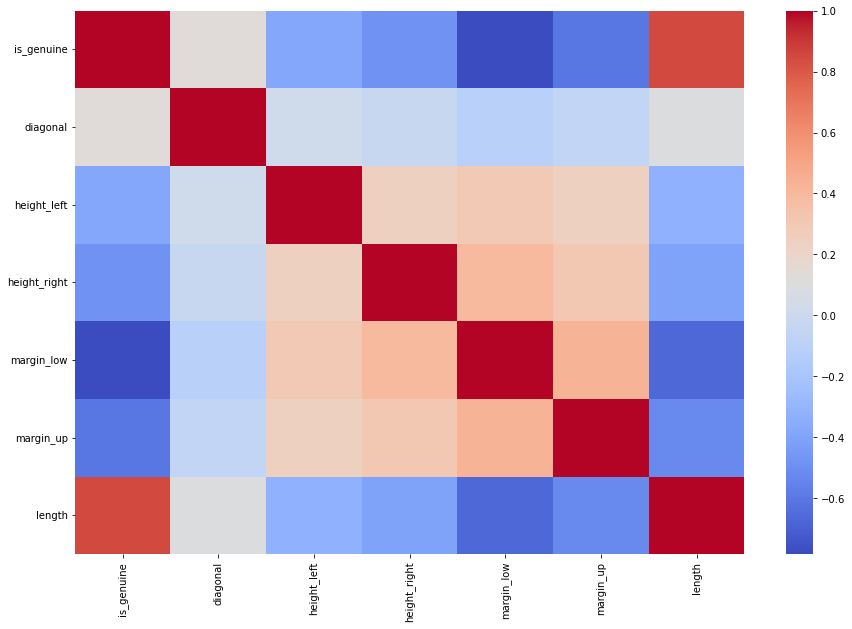

In [11]:
# Création de la heatmap
ax = sns.heatmap(billets_corr, cmap="coolwarm")
fig = ax.get_figure()
fig.set_size_inches(15, 10)
# Affichage de la heatmap
plt.show()

<AxesSubplot:>

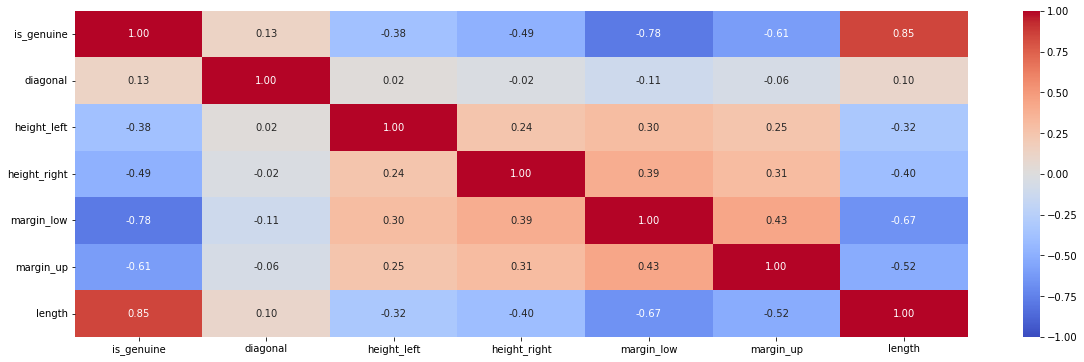

In [12]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(billets_corr, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

La non-corrélation ou la non-collinéarité des variables signifie que les variables utilisées pour modéliser ou prédire une réponse sont indépendantes les unes des autres. En d'autres termes, il n'y a pas de relation linéaire forte entre les variables.

Lorsque deux ou plusieurs variables sont fortement corrélées, cela peut causer des problèmes dans les modèles de régression, car cela peut mener à une instabilité des coefficients de régression ou une impossibilité de distinguer l'effet de chaque variable sur la réponse.

Il est important de vérifier la non-corrélation ou la non-collinéarité des variables avant de construire un modèle de régression. Les corrélations peuvent être mesurées par des statistiques telles que le coefficient de corrélation de Pearson ou le coefficient de corrélation de Spearman. Si des corrélations significatives sont identifiées, il peut être nécessaire de prendre des mesures telles que la suppression ou la transformation des variables pour garantir la fiabilité du modèle de régression.


On remarque : 

- La variable lenght est fortement corrélée à is_genuine
- La variable margin_low est fortement anti corrélée à la variable is_genuine
- La variable margin_up est assez anti corrélée à la variable is_genuine

##  Visulation des données

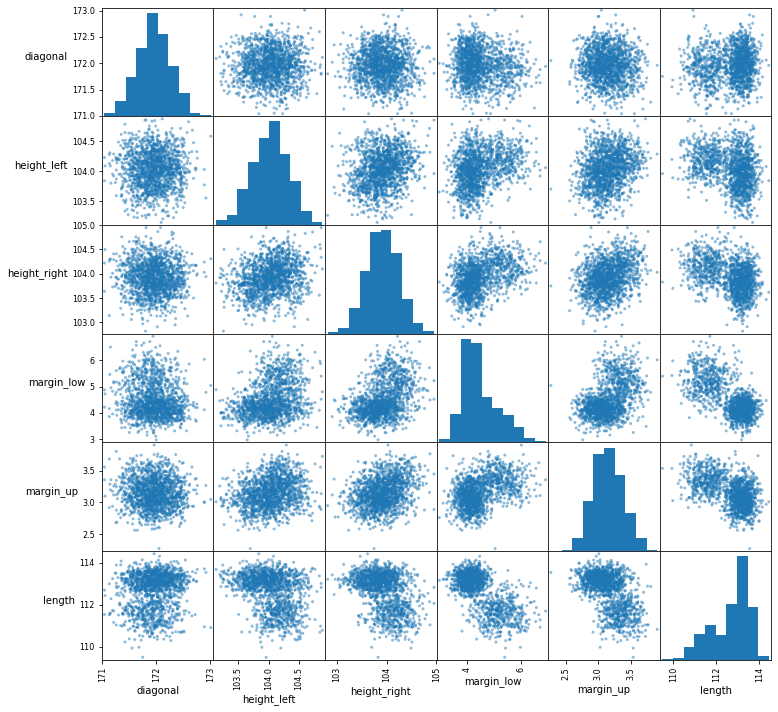

In [13]:
axes = pd.plotting.scatter_matrix(billets[['diagonal','height_left','height_right','margin_low','margin_up','length']],diagonal='hist', figsize=(12,12))

for ax in axes.flatten():
    
    ax.yaxis.label.set_rotation(0)
    
    ax.yaxis.label.set_ha('right')
    
plt.show()

On remarque que pour la variable lenght (celle qui est le plus corrélée avec la variable is_genuine)  des 'clusters' sont visibles.

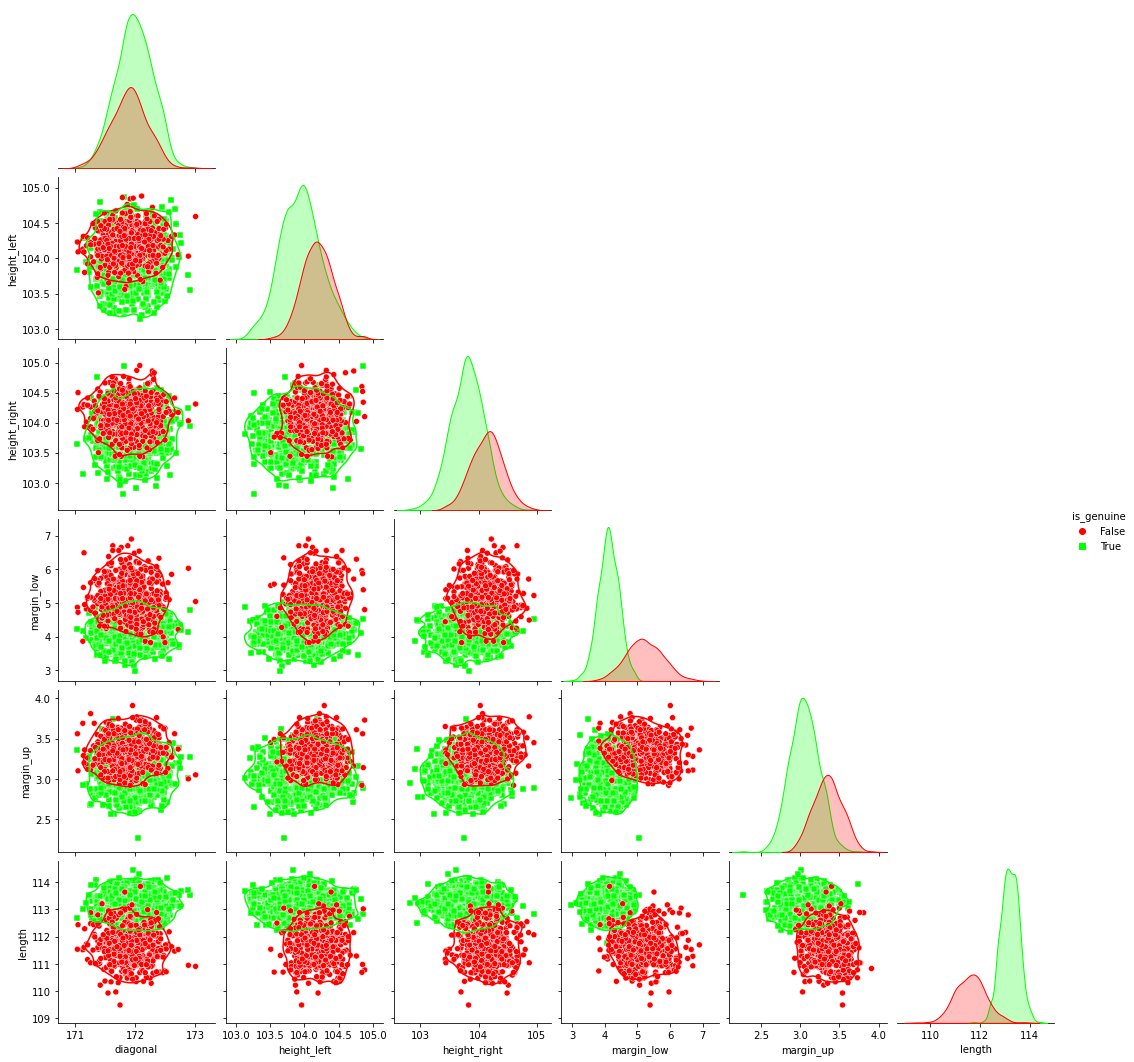

In [14]:
g = sns.pairplot(billets, hue='is_genuine', markers=['o','s'], corner=True, palette=['#FF0000', '#00FF00'])
g.map_lower(sns.kdeplot, levels=2, color='.2')

plt.show()



La projection du nuages de point concernant les variables lenght et margin_low est celle qui permet le mieux de discerner les vrais billets des faux, cela rejoint ce que nous avons vu concernant la corrélation de chacune de ses variables avec is_genuine

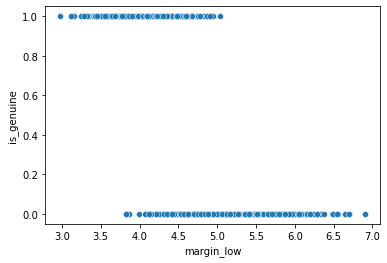

In [15]:
sns.scatterplot(x='margin_low',y='is_genuine', data = billets)
plt.show()


On observe que les vrais billets ont une marge basse plus petite que les faux 

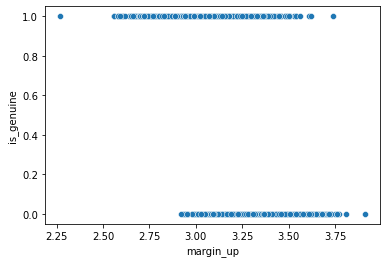

In [16]:
sns.scatterplot(x='margin_up',y='is_genuine', data = billets)
plt.show()


On observe que les vrais billets ont une marge haute plus petite que les faux 

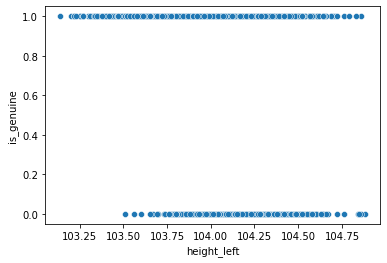

In [17]:
sns.scatterplot(x='height_left',y='is_genuine', data = billets)
plt.show()

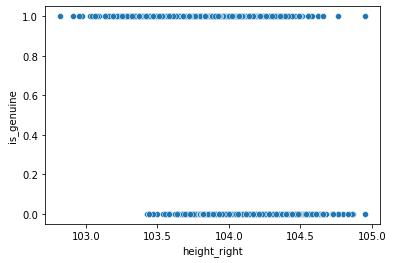

In [18]:
sns.scatterplot(x='height_right',y='is_genuine', data = billets)
plt.show()

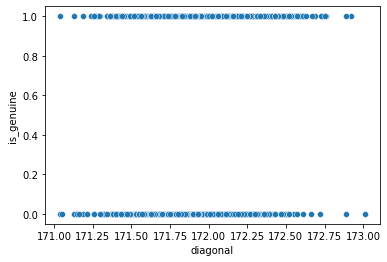

In [19]:
sns.scatterplot(x='diagonal',y='is_genuine', data = billets)
plt.show()

Cette variable n'est pas signficative

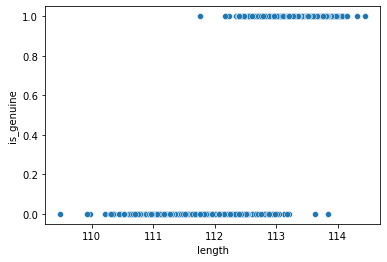

In [20]:
sns.scatterplot(x='length',y='is_genuine', data = billets)
plt.show()

On remarque que les vrais billets sont plus longs que les faux

In [21]:
billets.groupby("is_genuine").mean()

diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                
False       171.90116    104.19034     104.14362    5.215935    3.35016   
True        171.98708    103.94913     103.80865    4.116097    3.05213   

               length  
is_genuine             
False       111.63064  
True        113.20243

# **2. NETTOYAGE DES DONNEES**

Nous avons constaté lors de l'exploration des données qu'il manquait des valeurs pour la variable margin_low. La variable margin_low est fortement corrélée à la variable is_genuine, l'évincer de notre analyse ne serait pas judicieux. De plus remplacer les valeurs manquantes par 0 ne ferait que fausser l'analyse, il est donc nécessaire de remplacer les valeurs manquantes par des données cohérentes. Nous allons utiliser quelques méthodes d'apprentissage automatique, et choisir celui qui nous convient le mieux.


## 2.1 Regression linéaire

Un modèle de régression linéaire est une technique statistique utilisée pour établir une relation entre une variable continue appelée la variable dépendante et une ou plusieurs variables explicatives. La méthode de régression linéaire trouve la meilleure droite de régression qui représente la relation entre la variable dépendante et les variables explicatives. Cette droite peut ensuite être utilisée pour faire des prédictions sur les valeurs de la variable dépendante à partir des valeurs des variables explicatives. En résumé, un modèle de régression linéaire permet de modéliser et prédire la relation linéaire entre une variable dépendante et des variables explicatives.

### 2.1.1 Application de la régression linéaire

In [22]:
billets2 = billets.copy()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Charger les données
data = billets2

# Diviser les données en deux groupes: un ensemble avec des valeurs pour margin_low et un autre sans ces valeurs
known_data = data.dropna(subset=['margin_low'])
unknown_data = data[data['margin_low'].isna()]

# Séparer les variables prédicteurs et la variable cible pour l'ensemble de données avec des valeurs pour margin_low
X = known_data.drop(columns=['margin_low'])
y = known_data['margin_low']

# Entraîner un modèle de régression linéaire multiple en utilisant les autres variables comme prédicteurs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
reg = LinearRegression()
reg.fit(X_train, y_train)

# Utiliser le modèle pour prédire les valeurs manquantes de margin_low
predicted = reg.predict(unknown_data.drop(columns=['margin_low']))

# Remplacer les valeurs manquantes dans la dataframe d'origine avec les valeurs prédites
data.loc[data['margin_low'].isna(), 'margin_low'] = predicted

# Évaluer les performances du modèle
y_true = y_test  # si vous avez des valeurs réelles pour margin_low
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')


RMSE: 0.4447
MAE: 0.3349


RMSE (Root Mean Squared Error) et MAE (Mean Absolute Error) sont des métriques couramment utilisées pour évaluer les performances d'un modèle de régression.

La RMSE représente la racine carrée de la moyenne des carrés des différences entre les valeurs prédites et les valeurs réelles. Elle donne une indication de la différence moyenne entre les valeurs prédites et les valeurs réelles, en prenant en compte les écarts importants de manière plus prononcée que les écarts faibles. Une RMSE faible indique que le modèle a une bonne précision.

La MAE représente la moyenne des valeurs absolues des différences entre les valeurs prédites et les valeurs réelles. Elle donne une indication de l'écart moyen entre les valeurs prédites et les valeurs réelles, sans prendre en compte le signe des écarts. Une MAE faible indique que le modèle a une bonne précision.

En résumé, la RMSE et la MAE sont toutes les deux des mesures de la précision d'un modèle, mais la RMSE est plus sensible aux valeurs extrêmes, tandis que la MAE est plus robuste aux valeurs extrêmes.

In [24]:
reg.score(X_test, y_test)

0.608552306205302

In [25]:
reg.score(X_train, y_train)

0.6165312896445447

La méthode score est utilisée pour évaluer la performance du modèle de régression linéaire sur les données d'entraînement. Elle renvoie le coefficient de détermination R², qui est une mesure de la qualité du modèle de régression linéaire. Le coefficient de détermination R² est compris entre 0 et 1, où 1 indique que le modèle explique parfaitement la variance des données observées, et 0 indique que le modèle n'explique pas du tout la variance des données observées. Plus le R² est proche de 1, meilleure est la performance du modèle.

### 2.1.2 L'homoscédasticité

L'homoscédasticité est une propriété statistique qui se réfère à la constance de la variance des résidus d'un modèle de régression. En d'autres termes, cela signifie que les erreurs de prédiction du modèle sont également réparties sur toute la plage de valeurs de la variable dépendante. Un modèle de régression qui présente une homoscédasticité a des résidus qui sont aléatoires et non corrélés entre eux, ce qui suggère que le modèle est approprié pour les prévisions.

En revanche, un modèle de régression qui présente de l'hétéroscédasticité a des résidus qui ont une variance qui change avec la valeur de la variable dépendante. Cela peut entraîner des prévisions biaisées et des intervalles de confiance incorrects. L'homoscédasticité est donc un critère important pour l'évaluation de la qualité d'un modèle de régression.

Si les p-values des tests sont supérieures à un certain seuil (par exemple, 0,05), on peut conclure qu'il y a homoscédasticité dans les résidus du modèle. Si les p-values sont inférieures au seuil, on peut conclure qu'il y a hétéroscédasticité dans les résidus, c'est-à-dire que la variance des erreurs n'est pas constante.

Il est important de noter que l'interprétation des résultats du test dépend de la méthode utilisée. Dans le test de Bartlett, l'hypothèse nulle est que la variance des résidus est égale dans toutes les groupes définis par les variables indépendantes. Dans le test de Levene, l'hypothèse nulle est que la variance des résidus est égale entre deux groupes définis par la variable indépendante.

Les résidus d'un modèle de régression linéaire représentent la différence entre les valeurs observées et les valeurs prédites par le modèle. En d'autres termes, ce sont les écarts entre la variable cible et les prévisions de la régression. Les résidus peuvent être positifs ou négatifs selon que la valeur observée est supérieure ou inférieure à la valeur prédite. Les résidus sont souvent utilisés pour évaluer la qualité d'ajustement d'un modèle de régression. Si les résidus sont aléatoires et ont une distribution normale, cela suggère que le modèle est bien ajusté. Cependant, si les résidus présentent un modèle ou une structure spécifique, cela peut indiquer que le modèle ne capture pas toutes les informations importantes de la relation entre les variables.

Une p-value de 0 pour ces tests signifie que la variance des résidus est significativement différente de constante. Cela indique que l'hypothèse d'homogénéité de variance n'est pas vérifiée et que la variance des résidus varie en fonction des niveaux des variables indépendantes. Dans ce cas, une solution serait d'utiliser des méthodes qui sont robustes à l'hétéroscédasticité, telles que la régression linéaire pondérée ou la régression linéaire robuste.


**Tests de Levene et Barlett**

In [26]:
from scipy.stats import bartlett, levene

# Réaliser le test de Bartlett
bartlett_test = bartlett(billets2['margin_low'], billets2['diagonal'], billets2['height_left'], billets2['height_right'],billets2['is_genuine'],billets2['margin_up'],billets2['length'])
print('Résultat du test de Bartlett : p-value =', bartlett_test.pvalue)

# Réaliser le test de Levene
levene_test = levene(billets2['margin_low'], billets2['diagonal'], billets2['height_left'], billets2['height_right'],billets2['is_genuine'],billets2['margin_up'],billets2['length'])
print('Résultat du test de Levene : p-value =', levene_test.pvalue)

Résultat du test de Bartlett : p-value = 0.0
Résultat du test de Levene : p-value = 0.0


In [27]:
from scipy.stats import bartlett, levene

# Réaliser le test de Bartlett
bartlett_test = bartlett(billets2['is_genuine'], billets2['diagonal'], billets2['height_left'], billets2['height_right'],billets2['margin_low'],billets2['margin_up'],billets2['length'])
print('Résultat du test de Bartlett : p-value =', bartlett_test.pvalue)

# Réaliser le test de Levene
levene_test = levene(billets2['is_genuine'], billets2['diagonal'], billets2['height_left'], billets2['height_right'],billets2['margin_low'],billets2['margin_up'],billets2['length'])
print('Résultat du test de Levene : p-value =', levene_test.pvalue)

Résultat du test de Bartlett : p-value = 0.0
Résultat du test de Levene : p-value = 0.0


**Test de Breusch-Pagan**

Le test de Breusch-Pagan est un test statistique utilisé en régression linéaire pour déterminer si la variance des résidus d'un modèle linéaire est constante ou non. Il est utilisé pour détecter l'hétéroscédasticité dans les données.

L'hétéroscédasticité est présente lorsque la variance des résidus est différente pour différentes valeurs de la variable indépendante. Elle peut avoir un impact sur la validité des résultats de la régression et sur les estimations des coefficients.

Le test de Breusch-Pagan consiste à calculer une statistique de test qui suit une distribution de chi-carré. Si la p-value correspondante est inférieure à un certain seuil (généralement 0,05), on rejette l'hypothèse nulle selon laquelle la variance des résidus est constante. Cela indique la présence d'hétéroscédasticité.

Il est important de noter que ce test ne fournit pas d'informations sur la nature de l'hétéroscédasticité, c'est-à-dire s'il s'agit d'une augmentation ou d'une diminution de la variance des résidus en fonction de la variable indépendante. Dans ce cas, il peut être nécessaire d'utiliser d'autres méthodes pour corriger l'hétéroscédasticité.

In [28]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Sélectionner la colonne 'margin_low'
y = billets['margin_low'].dropna()

# Estimer le modèle linéaire sans variable explicative (interception uniquement)
model = sm.OLS(y, sm.add_constant(np.ones(len(y))))

# Obtenir les résidus
residus = model.fit().resid

# Effectuer le test de Breusch-Pagan
bp_test = het_breuschpagan(residus, sm.add_constant(np.ones(len(y))))

# Afficher le résultat
p_value = bp_test[1]
print("p-value : ", p_value)
if p_value > 0.05:
    print("Le test ne rejette pas l'hypothèse d'homoscédasticité")
else:
    print("Le test rejette l'hypothèse d'homoscédasticité")


p-value :  nan
Le test rejette l'hypothèse d'homoscédasticité


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [30]:
billets_describe = billets.describe()
billets_describe

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1463.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.485967     3.151473   
std       0.305195     0.299462      0.325627     0.663813     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.015000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [31]:
data_describe = billets_describe-data.describe()
data_describe = data_describe.drop(columns =['diagonal','height_left','height_right','margin_up','length'])
data_describe = data_describe.rename(columns={'margin_low': 'data'})
data_describe

data
count -37.000000
mean    0.003348
std     0.004066
min     0.000000
25%    -0.012500
50%     0.000000
75%     0.000000
max     0.000000

## 2.2 Regression linéaire robuste

Un modèle de régression linéaire robuste est un modèle qui est capable de fournir des estimations de paramètres de régression fiables même en présence d'observations aberrantes (outliers) dans les données. Contrairement au modèle de régression linéaire ordinaire qui est très sensible aux valeurs aberrantes, les modèles de régression linéaire robustes utilisent des méthodes statistiques et des algorithmes qui sont moins sensibles aux valeurs aberrantes et qui peuvent donner des résultats plus précis et plus fiables dans de telles situations. 

In [96]:
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Charger les données
data2 = billets.copy()

# Diviser les données en deux groupes: un ensemble avec des valeurs pour margin_low et un autre sans ces valeurs
known_data = data2.dropna(subset=['margin_low'])
unknown_data = data2[data2['margin_low'].isna()]

# Séparer les variables prédicteurs et la variable cible pour l'ensemble de données avec des valeurs pour margin_low
X = known_data.drop(columns=['margin_low'])
y = known_data['margin_low']

# Entraîner un modèle de régression robuste en utilisant les autres variables comme prédicteurs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
reg22 = RANSACRegressor()
reg22.fit(X_train, y_train)

# Utiliser le modèle pour prédire les valeurs manquantes de margin_low
predicted = reg.predict(unknown_data.drop(columns=['margin_low']))

# Remplacer les valeurs manquantes dans la dataframe d'origine avec les valeurs prédites
data2.loc[data2['margin_low'].isna(), 'margin_low'] = predicted

# Évaluer les performances du modèle
y_true = y_test  # si vous avez des valeurs réelles pour margin_low
y_pred = reg.predict(X_test)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')


RMSE: 0.4447
MAE: 0.3349


In [95]:
print(reg22.score(X_test, y_test))
print(reg22.score(X_train, y_train))

0.5133060593663479
0.5314080799087646


In [97]:
data2_describe = billets_describe-data2.describe()
data2_describe = data2_describe.drop(columns =['diagonal','height_left','height_right','margin_up','length'])
data2_describe = data2_describe.rename(columns={'margin_low': 'data'})
data2_describe

data
count -37.000000
mean    0.003348
std     0.004066
min     0.000000
25%    -0.012500
50%     0.000000
75%     0.000000
max     0.000000

## 2.3 KNN

KNN (K-Nearest Neighbors) est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. L'objectif de l'algorithme KNN est de trouver les K instances d'entraînement les plus proches dans l'espace des caractéristiques d'une instance de test donnée, puis de prédire l'étiquette de cette instance de test en fonction des étiquettes des instances d'entraînement les plus proches. La proximité est généralement mesurée en utilisant une distance euclidienne ou une distance de Manhattan entre les caractéristiques des instances. Le choix de la valeur de K dépend du problème et doit être choisie en fonction de la complexité de la frontière de décision et de la taille de l'ensemble de données.


In [34]:
billets_knn = billets.copy()
from sklearn.neighbors import KNeighborsRegressor
# Séparation de la dataframe en deux : une partie avec des valeurs de "margin_low" connues et une partie avec des valeurs manquantes
df_known = billets_knn[billets_knn['margin_low'].notna()]
df_unknown = billets_knn[billets_knn['margin_low'].isna()]

# Définition des variables explicatives et de la variable cible pour l'apprentissage du modèle
X = df_known.drop('margin_low', axis=1)
y = df_known['margin_low']

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et apprentissage du modèle KNN
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Prédiction des valeurs manquantes
y_pred = knn.predict(df_unknown.drop('margin_low', axis=1))

# Remplacement des valeurs manquantes par les valeurs prédites
billets_knn.loc[billets_knn['margin_low'].isna(), 'margin_low'] = y_pred

# Calcul de l'erreur quadratique moyenne (MSE) pour évaluer la performance du modèle
mse = mean_squared_error(y_test, knn.predict(X_test))
mae = mean_absolute_error(y_test, knn.predict(X_test))
print("MSE: ", mse)
print("MAE:",mae)

MSE:  0.1805278906605922
MAE: 0.3313439635535307


In [35]:
knn.score(X_train, y_train)

0.6667120104490041

In [36]:
knn.score(X_test,y_test)

0.5771833946572593

On obtient des "scores" d'évaluation de la performance  meilleur que pour la regression linéaire

In [37]:
billets_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [38]:
billets_knn.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.483017     3.151473   
std       0.305195     0.299462      0.325627     0.659225     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.310000     3.140000   
75%     172.170000   104.230000    104.150000     4.870000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [39]:
billetsknn_describe = billets_describe - billets_knn.describe()
billetsknn_describe = billetsknn_describe.drop(columns =['diagonal','height_left','height_right','margin_up','length'])
billetsknn_describe = billetsknn_describe.rename(columns={'margin_low': 'knn'})
billetsknn_describe

knn
count -37.000000
mean    0.002950
std     0.004587
min     0.000000
25%    -0.005000
50%     0.000000
75%     0.000000
max     0.000000

## 2.4 MLE

MLE (Maximum Likelihood Estimation) est une méthode d'estimation de paramètres de modèle statistique basée sur la maximisation de la vraisemblance des données observées. L'objectif de la méthode est de trouver les valeurs des paramètres qui rendent les données observées les plus probables selon le modèle. Cela implique de trouver les valeurs des paramètres qui maximisent la fonction de vraisemblance, qui est la probabilité conditionnelle des données observées étant donné les paramètres du modèle. Le MLE est couramment utilisé dans les domaines de la statistique, de l'apprentissage automatique et de l'analyse de données pour estimer des paramètres inconnus à partir de données observées.

In [40]:

import pandas as pd
import numpy as np
from scipy.stats import norm

# Chargement de la dataframe
billetsmle = billets.copy()

# Fonction pour calculer la log-vraisemblance
def log_likelihood(data, mean, std):
    return np.sum(norm.logpdf(data, loc=mean, scale=std))
 
# Fonction pour imputer les valeurs manquantes
def impute_missing_values(x): 
    mean = np.mean(x.dropna())
    std = np.std(x.dropna())
    n_missing = sum(np.isnan(x))
    imputed_values = np.random.normal(loc=mean, scale=std, size=n_missing)
    return pd.Series(np.concatenate([x.dropna().values, imputed_values]))

# Imputation des valeurs manquantes en utilisant la MLE
billets_mle = billetsmle.copy()
billets_mle["margin_low"] = impute_missing_values(billets_mle["margin_low"])

# Évaluer la performance en utilisant la log-vraisemblance
log_likelihood_true = log_likelihood(billets["margin_low"].dropna(), np.mean(billets["margin_low"]), np.std(billets["margin_low"]))
log_likelihood_imputed = log_likelihood(billets_mle["margin_low"], np.mean(billets_mle["margin_low"]), np.std(billets_mle["margin_low"]))
performance = log_likelihood_imputed - log_likelihood_true
print("Performance (log-vraisemblance) : ", performance)


Performance (log-vraisemblance) :  -35.78461853659155


Ce code est utilisé pour l'imputation de valeurs manquantes en utilisant la Maximum Likelihood Estimation (MLE) et pour évaluer la performance en utilisant la log-vraisemblance.

Le code commence par charger une dataframe de billets et définit une fonction pour calculer la log-vraisemblance. Ensuite, une fonction est définie pour imputer les valeurs manquantes en utilisant la MLE. Cette fonction calcule la moyenne et l'écart-type des valeurs non manquantes, génère des valeurs imputées pour les valeurs manquantes en utilisant une distribution normale, puis renvoie une série de toutes les valeurs, à la fois les valeurs non manquantes et les valeurs imputées.

Le code impute les valeurs manquantes de la colonne "margin_low" dans la dataframe "billets" en utilisant la fonction "impute_missing_values". Ensuite, il calcule la log-vraisemblance des valeurs non manquantes et des valeurs imputées et compare les deux pour évaluer la performance de l'imputation en utilisant la MLE.

La performance est mesurée par la log-vraisemblance (log-likelihood) qui mesure la probabilité d'observer les données en utilisant le modèle entraîné. Plus la log-vraisemblance est proche de zéro (ou plus grande en valeur absolue), meilleure est la performance. 

In [41]:
billets_mle.describe()

diagonal  height_left  height_right   margin_low    margin_up  \
count  1500.000000  1500.000000   1500.000000  1500.000000  1500.000000   
mean    171.958440   104.029533    103.920307     4.488258     3.151473   
std       0.305195     0.299462      0.325627     0.663125     0.231813   
min     171.040000   103.140000    102.820000     2.980000     2.270000   
25%     171.750000   103.820000    103.710000     4.020000     2.990000   
50%     171.960000   104.040000    103.920000     4.320000     3.140000   
75%     172.170000   104.230000    104.150000     4.880000     3.310000   
max     173.010000   104.880000    104.950000     6.900000     3.910000   

           length  
count  1500.00000  
mean    112.67850  
std       0.87273  
min     109.49000  
25%     112.03000  
50%     112.96000  
75%     113.34000  
max     114.44000

In [42]:
billets_mle_describe = billets_describe - billets_mle.describe()
billets_mle_describe = billets_mle_describe.drop(columns =['diagonal','height_left','height_right','margin_up','length'])
billets_mle_describe = billets_mle_describe.rename(columns={'margin_low': 'mle'})
billets_mle_describe

mle
count -37.000000
mean   -0.002290
std     0.000688
min     0.000000
25%    -0.005000
50%    -0.010000
75%    -0.010000
max     0.000000

## 2.5 COMPARAISON

In [43]:
data_describe = data_describe.reset_index()
data_describe

index       data
0  count -37.000000
1   mean   0.003348
2    std   0.004066
3    min   0.000000
4    25%  -0.012500
5    50%   0.000000
6    75%   0.000000
7    max   0.000000

In [99]:
data2_describe = data2_describe.reset_index()
data2_describe

index       data
0  count -37.000000
1   mean   0.003348
2    std   0.004066
3    min   0.000000
4    25%  -0.012500
5    50%   0.000000
6    75%   0.000000
7    max   0.000000

In [102]:
data2_describe = data2_describe.rename(columns={'data': 'data2'})
data2_describe

index  data2 poulet
0  count    -37.000000
1   mean      0.003348
2    std      0.004066
3    min      0.000000
4    25%     -0.012500
5    50%      0.000000
6    75%      0.000000
7    max      0.000000

In [44]:
billetsknn_describe = billetsknn_describe.reset_index()
billetsknn_describe

index        knn
0  count -37.000000
1   mean   0.002950
2    std   0.004587
3    min   0.000000
4    25%  -0.005000
5    50%   0.000000
6    75%   0.000000
7    max   0.000000

In [45]:
billets_mle_describe = billets_mle_describe.reset_index()
billets_mle_describe

index        mle
0  count -37.000000
1   mean  -0.002290
2    std   0.000688
3    min   0.000000
4    25%  -0.005000
5    50%  -0.010000
6    75%  -0.010000
7    max   0.000000

In [46]:
# Jointure des deux premiers DataFrame (df1 et df2) en utilisant la colonne "index"
df_describe_merged = pd.merge(data_describe, billetsknn_describe, on='index', how='outer')

# Jointure du troisième DataFrame (df3) en utilisant la colonne "id"
df_describe_merged = pd.merge(df_describe_merged, billets_mle_describe, on='index', how='outer')
df_describe_merged

index       data        knn        mle
0  count -37.000000 -37.000000 -37.000000
1   mean   0.003348   0.002950  -0.002290
2    std   0.004066   0.004587   0.000688
3    min   0.000000   0.000000   0.000000
4    25%  -0.012500  -0.005000  -0.005000
5    50%   0.000000   0.000000  -0.010000
6    75%   0.000000   0.000000  -0.010000
7    max   0.000000   0.000000   0.000000

In [103]:
# Jointure du troisième DataFrame (df3) en utilisant la colonne "id"
df_describe_merged = pd.merge(df_describe_merged, data2_describe, on='index', how='outer')
df_describe_merged

index       data        knn        mle  data2 poulet
0  count -37.000000 -37.000000 -37.000000    -37.000000
1   mean   0.003348   0.002950  -0.002290      0.003348
2    std   0.004066   0.004587   0.000688      0.004066
3    min   0.000000   0.000000   0.000000      0.000000
4    25%  -0.012500  -0.005000  -0.005000     -0.012500
5    50%   0.000000   0.000000  -0.010000      0.000000
6    75%   0.000000   0.000000  -0.010000      0.000000
7    max   0.000000   0.000000   0.000000      0.000000

Je vais faire le choix de garder la df créee avec la méthode MLE

# **3. MODELES DE PREDICTION**

## **3.1 EXPLORATION ACP et KMEANS**

### 3.1.1 ACP

L'ACP a deux objectifs principaux. 


Elle permet d'étudier :

   -  la variabilité entre les individus, c'est-à-dire quelles sont les différences et les ressemblances entre individus. 

   - les liaisons entre les variables : y a-t-il des groupes de variables très corrélées entre elles, qui peuvent être regroupées en de nouvelles variables synthétiques ?
   
On va rechercher la ou les projection(s) pour laquelle/lesquelles l’inertie des points est/sont maximale(s).
On va créer des dimensions synthétiques calculées à partir des dimensions initiales tout en maximisant la variance des données.

Enfin, on va chercher à réduire le nombre de dimensions (variables) en perdant le moins d'informations possible.

In [47]:
# Préparation des données pour l'ACP
X = billets_mle.drop(columns=["is_genuine"]).values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-0.48653957,  2.77412327,  3.16324041,  0.04788375, -1.128325  ,
         0.17365114],
       [-1.63372936, -2.23653528, -0.79966777, -1.08350234, -0.69679916,
         0.47166629],
       [ 2.3978233 ,  1.50475644, -1.29119126, -0.13313802, -0.91256208,
         0.55190114],
       ...,
       [-0.51931643, -0.06524991,  0.61346228,  0.77815123,  0.89984645,
        -0.83501554],
       [ 0.3328817 ,  0.83666863,  0.42914097,  0.30063731,  1.33137229,
        -0.4911519 ],
       [-1.6009525 ,  0.40241156, -0.30814427,  0.56134204,  0.94299904,
        -0.69747008]])

In [48]:
# On vérifie que nos données sont normalisées et on espère avoir une moyenne à 0 et un écart type à 1 : 
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean -0.0  0.0 -0.0 -0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

### Eboulis des valeurs propres

Cours :
Vous savez qu’en ACP, on projette les données sur les axes principaux d’inertie, et que ceux-ci sont ordonnés selon l’inertie du nuage projeté : de la plus grande à la plus petite.

Quand on additionne les inerties associées à tous les axes, on obtient l’inertie totale du nuage des individus.

On peut donc afficher un diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe.

On appelle ce diagramme l’éboulis des valeurs propres.
On peut également afficher la somme cumulée des inerties, c’est une courbe qui part de l’origine et qui arrive à 100 % après avoir parcouru tous les axes. (courbe rouge)

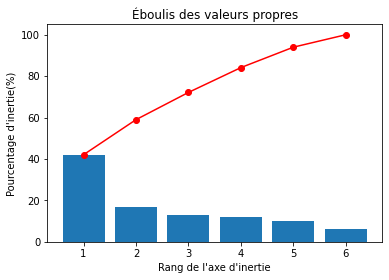

In [49]:


# Définition de la fonction pour le graphique Éboulis des valeurs propres

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(), c="red", marker='o')
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie(%)")
    plt.title("Éboulis des valeurs propres")
    plt.show(block=False)

# Nombre de composants souhaités
n_comp = 6

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

display_scree_plot(pca)
plt.show()



In [50]:
# Proportion de variance expliquée
pca.explained_variance_ratio_

array([0.42045859, 0.16939263, 0.13158251, 0.1199562 , 0.09853022,
       0.06007984])

In [51]:
# Proportion de variance expliquée
pca.explained_variance_ratio_.sum()

1.0

### CERCLES DE CORRELATIONS

Cours : 
Qu’y voit-on ?
On y voit un cercle, de rayon 1. L’axe des abscisses représente le premier axe d'inertie Fn. L’axe des ordonnées représente Fn+1 .

À l’intérieur du cercle, il y a des flèches qui partent du centre. Elles sont plus ou moins grandes, et peuvent aller jusqu’à toucher le cercle, sans jamais le dépasser (si les données sont centrées (ce qui est le cas dans un ACP, puisqu'elle se réalise sur des données centrées réduites).

Il est préférable de n'interpreter que les flèches les plus longues (celles qui sont le plus correlées).

Ci-dessous deux fonctions permettant de tracer les cercles de corrélation, j'ai choisi les deux pour pouvoir pallier au soucis de lecture.

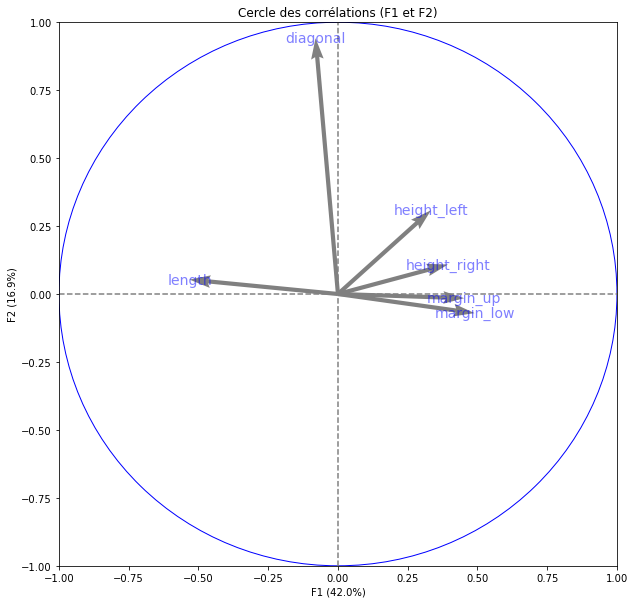

In [52]:
from matplotlib.collections import LineCollection

# Définition de la fonction pour le graphique Cercle de corrélation


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:  # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10, 10))

            # détermination des limites du graphique
            if lims is not None:
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30:
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else:
                xmin, xmax, ymin, ymax = min(pcs[d1, :]), max(
                    pcs[d1, :]), min(pcs[d2, :]), max(pcs[d2, :])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30:
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                           pcs[d1, :], pcs[d2, :],
                           angles='xy', scale_units='xy', scale=1, color="grey")
            else:
                lines = [[[0, 0], [x, y]] for x, y in pcs[[d1, d2]].T]
                ax.add_collection(LineCollection(
                    lines, axes=ax, alpha=.1, color='black'))

            # affichage des noms des variables
            if labels is not None:
                for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax:
                        plt.text(x, y, labels[i], fontsize='14', ha='center',
                                 va='center', rotation=label_rotation, color="blue", alpha=0.5)

            # affichage du cercle
            circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Cercle des corrélations

n_comp = 6
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0, 1)],
                labels=np.array(billets_mle.columns[1:7]))

plt.show()

Les variables les plus corrélées au premier plan factoriel sont les variables diagonal et lenght

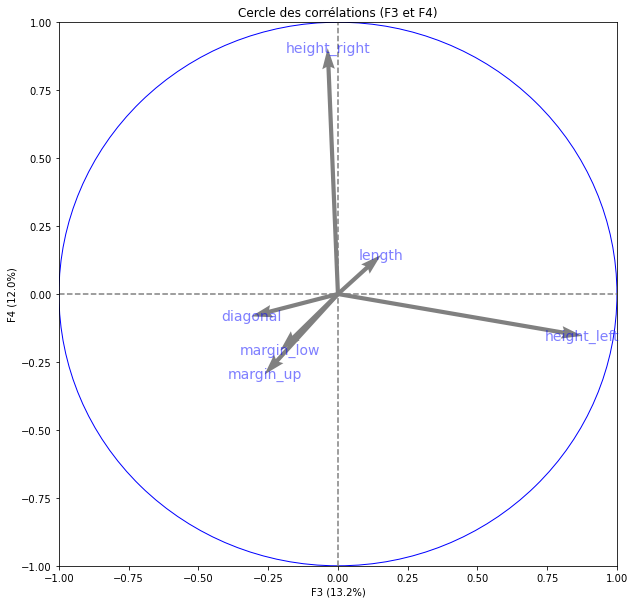

In [53]:
display_circles(pcs, n_comp, pca, [(2, 3)],
                labels=np.array(billets_mle.columns[1:7]))

plt.show()

Les variables les plus corrélées au second plan factoriel sont les variables height_left et height_right

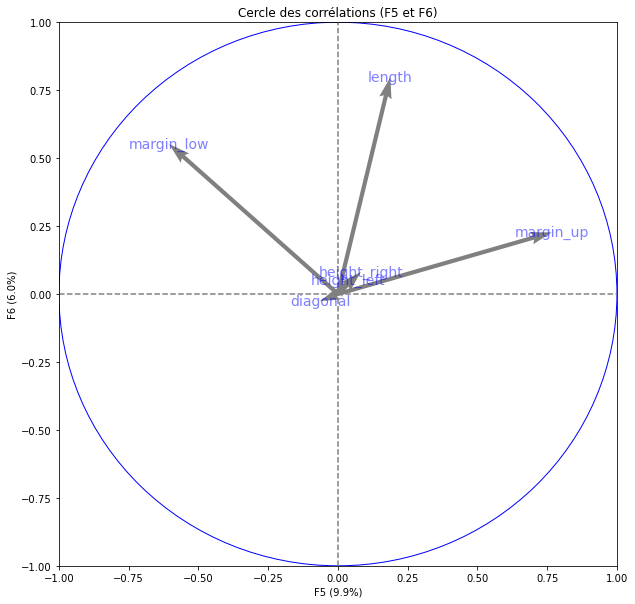

In [54]:
display_circles(pcs, n_comp, pca, [(4, 5)],
                labels=np.array(billets_mle.columns[1:7]))

plt.show()

Les variables les plus corrélées au troisieme plan factoriel sont margin_low lenght et margin_up

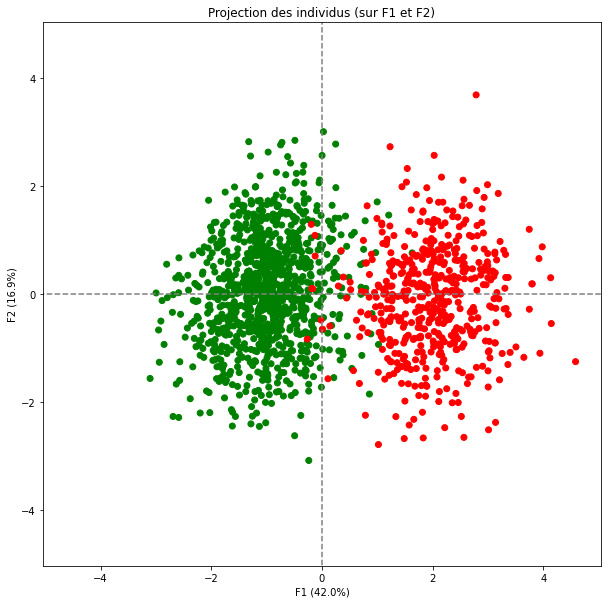

In [55]:
# Définition de la fonction pour le graphique Projection des individus sur les plans factoriels
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig = plt.figure(figsize=(10, 10))

            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1],
                            X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                colors = ['red' if x == False else 'green' for x in illustrative_var]
                plt.scatter(X_projected[:, d1], X_projected[:, d2], c=colors, alpha=alpha)

            # affichage des labels des points
            if labels is not None:
                for i, (x, y) in enumerate(X_projected[:, [d1, d2]]):
                    plt.text(x, y, labels[i],
                             fontsize='14', ha='center', va='center')

            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1, d2]])) * 1.1
            plt.xlim([-boundary, boundary])
            plt.ylim([-boundary, boundary])

            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(
                d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            plt.ylabel('F{} ({}%)'.format(
                d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            plt.title(
                "Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


# Projection des individus sur F1 et F2
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var=billets.is_genuine)



La projection des individus sur le premier plan factoriel permet dans l'ensemble de bien distinguer les vrais billets des faux

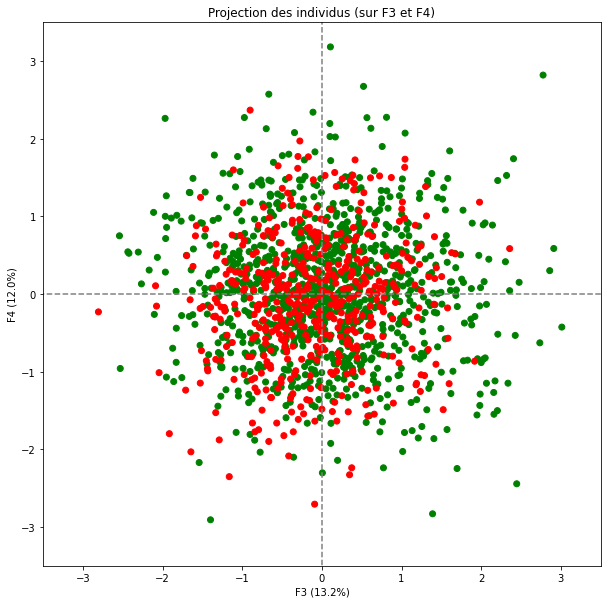

In [56]:
display_factorial_planes(X_projected, n_comp, pca, [(2, 3)], illustrative_var=billets.is_genuine)

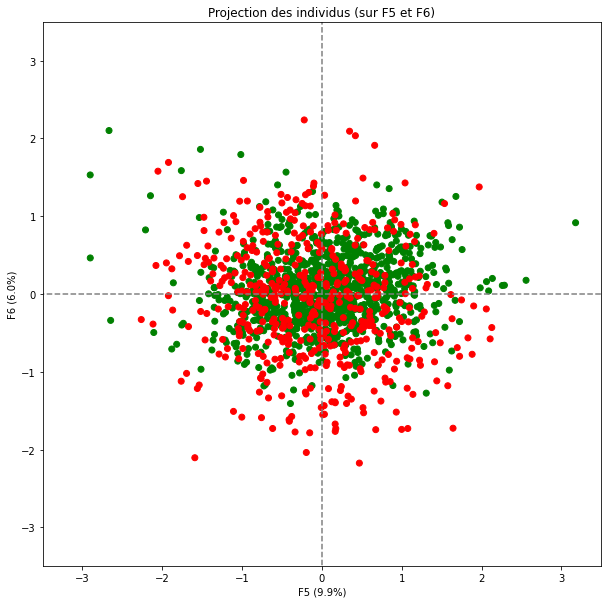

In [57]:
display_factorial_planes(X_projected, n_comp, pca, [(4, 5)], illustrative_var=billets.is_genuine)

Sur le deuxieme et troisieme plan factoriel, la projection des points ne permet aucune distinction

In [58]:
# On "transforme" la variable en df
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5
0 -0.080288  0.332928  0.393998  0.489507  0.452577 -0.532010
1  0.941092  0.307517  0.108558 -0.070305 -0.015369  0.053051
2 -0.310318  0.875726 -0.036782 -0.206576 -0.262824  0.153960
3 -0.082401 -0.154135  0.904621 -0.207553 -0.295789  0.143331
4 -0.064155  0.034990  0.082129 -0.604767  0.766124  0.187686
5 -0.026375  0.052098  0.080888  0.551313  0.226770  0.796666

In [59]:
billets_acp=billets_mle.drop(columns=["is_genuine"])

In [60]:
# On nomme nos axes
features = billets_acp.columns
x_list = range(1, n_comp+1)
list(x_list)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

diagonal  height_left  height_right  margin_low  margin_up  length
F1     -0.08         0.33          0.39        0.49       0.45   -0.53
F2      0.94         0.31          0.11       -0.07      -0.02    0.05
F3     -0.31         0.88         -0.04       -0.21      -0.26    0.15
F4     -0.08        -0.15          0.90       -0.21      -0.30    0.14
F5     -0.06         0.03          0.08       -0.60       0.77    0.19
F6     -0.03         0.05          0.08        0.55       0.23    0.80

<AxesSubplot:>

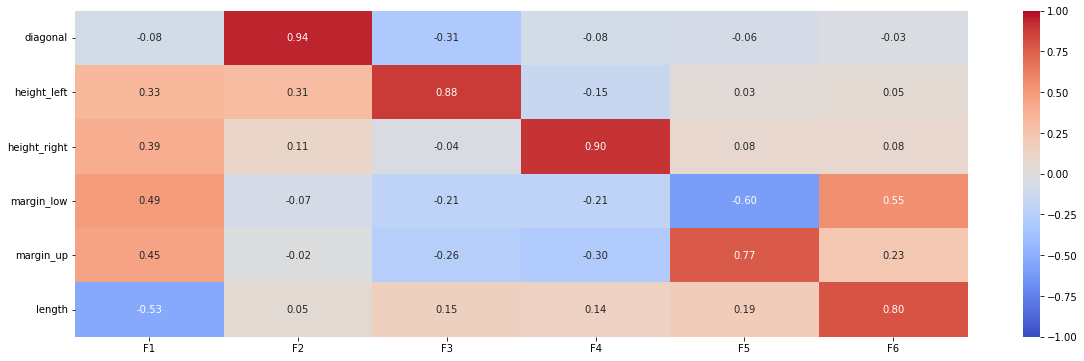

In [61]:
# On change l'affichage de la df en transposant index et colonnes
pcsT = pcs.T
# On crée une heatmap, permettant de lire visuelllement nos données, et ainsi identifier les 'corrélations'
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")


On peut voir les corrélations citées et observées sur les cercles de corrélation précédemment

In [62]:
# ajouter les composantes principales au dataframe
X_projected = pca.transform(X)
billets_acp['F1'] = X_projected[:,0]
billets_acp['F2'] = X_projected[:,1]
billets_acp

diagonal  height_left  height_right  margin_low  margin_up  length  \
0       171.81       104.86        104.95    4.520000       2.89  112.83   
1       171.46       103.36        103.66    3.770000       2.99  113.09   
2       172.69       104.48        103.50    4.400000       2.94  113.16   
3       171.36       103.91        103.94    3.620000       3.01  113.51   
4       171.73       104.28        103.46    4.040000       3.48  112.54   
...        ...          ...           ...         ...        ...     ...   
1495    171.75       104.38        104.17    3.916298       3.09  111.28   
1496    172.19       104.63        104.44    4.024331       3.37  110.97   
1497    171.80       104.01        104.12    5.004097       3.36  111.95   
1498    172.06       104.28        104.06    4.687551       3.46  112.25   
1499    171.47       104.15        103.82    4.860373       3.37  112.07   

            F1          F2  
0     5.960438  210.952114  
1     4.520694  210.086400  
2     4.980299  211.531184  
3     4.534334  210.224342  
4     5.373045  210.546008  
...        ...         ...  
1495  6.117746  210.620504  
1496  6.616558  211.112430  
1497  6.269083  210.503267  
1498  6.045162  210.861100  
1499  6.094319  210.219508  

[1500 rows x 8 columns]

In [63]:
billets_acp['is_genuine']=billets_mle["is_genuine"]
billets_acp

diagonal  height_left  height_right  margin_low  margin_up  length  \
0       171.81       104.86        104.95    4.520000       2.89  112.83   
1       171.46       103.36        103.66    3.770000       2.99  113.09   
2       172.69       104.48        103.50    4.400000       2.94  113.16   
3       171.36       103.91        103.94    3.620000       3.01  113.51   
4       171.73       104.28        103.46    4.040000       3.48  112.54   
...        ...          ...           ...         ...        ...     ...   
1495    171.75       104.38        104.17    3.916298       3.09  111.28   
1496    172.19       104.63        104.44    4.024331       3.37  110.97   
1497    171.80       104.01        104.12    5.004097       3.36  111.95   
1498    172.06       104.28        104.06    4.687551       3.46  112.25   
1499    171.47       104.15        103.82    4.860373       3.37  112.07   

            F1          F2  is_genuine  
0     5.960438  210.952114        True  
1     4.520694  210.086400        True  
2     4.980299  211.531184        True  
3     4.534334  210.224342        True  
4     5.373045  210.546008        True  
...        ...         ...         ...  
1495  6.117746  210.620504       False  
1496  6.616558  211.112430       False  
1497  6.269083  210.503267       False  
1498  6.045162  210.861100       False  
1499  6.094319  210.219508       False  

[1500 rows x 9 columns]

### 3.1.2 KMEANS

Le K-means est un algorithme de clustering qui consiste à regrouper des données en K groupes (ou clusters) distincts en fonction de leurs similarités. L'algorithme itère en réassignant les points de données au groupe le plus proche en fonction de la distance euclidienne entre les données et les centres de groupe (centroïdes) jusqu'à ce que le groupe n'ait plus besoin d'être modifié. Le résultat final est K groupes contenant des données similaires.

Remarque :
    
    Le K-means est un algorithme de clustering, qui vise à partitionner un ensemble de données en plusieurs groupes, appelés clusters. Cet algorithme ne prend pas en compte les variables de sortie, et ne permet pas de classifier des observations en fonction d'une variable cible. Par conséquent, il n'est pas adapté pour prédire si des billets sont vrais ou faux. Nous l'utiliserons cependant pour ne pas passer à coté.

In [64]:
billets_kmeans= billets_acp.copy()

In [65]:


# Classification méthode Kmeans
km = KMeans(2, random_state=150)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
billets_kmeans["Clusters"] = km.labels_
billets_kmeans



diagonal  height_left  height_right  margin_low  margin_up  length  \
0       171.81       104.86        104.95    4.520000       2.89  112.83   
1       171.46       103.36        103.66    3.770000       2.99  113.09   
2       172.69       104.48        103.50    4.400000       2.94  113.16   
3       171.36       103.91        103.94    3.620000       3.01  113.51   
4       171.73       104.28        103.46    4.040000       3.48  112.54   
...        ...          ...           ...         ...        ...     ...   
1495    171.75       104.38        104.17    3.916298       3.09  111.28   
1496    172.19       104.63        104.44    4.024331       3.37  110.97   
1497    171.80       104.01        104.12    5.004097       3.36  111.95   
1498    172.06       104.28        104.06    4.687551       3.46  112.25   
1499    171.47       104.15        103.82    4.860373       3.37  112.07   

            F1          F2  is_genuine  Clusters  
0     5.960438  210.952114        True         0  
1     4.520694  210.086400        True         1  
2     4.980299  211.531184        True         1  
3     4.534334  210.224342        True         1  
4     5.373045  210.546008        True         1  
...        ...         ...         ...       ...  
1495  6.117746  210.620504       False         0  
1496  6.616558  211.112430       False         0  
1497  6.269083  210.503267       False         0  
1498  6.045162  210.861100       False         0  
1499  6.094319  210.219508       False         0  

[1500 rows x 10 columns]

J'ai choisi 2 clusters sans effectuer la méthode du coude, parce qu'on cherche à savoir si les billets sont vrais ou faux

In [66]:
billets_kmeans['Clusters'].value_counts()

1    998
0    502
Name: Clusters, dtype: int64

Le clustering semble se rapprocher de la réalité

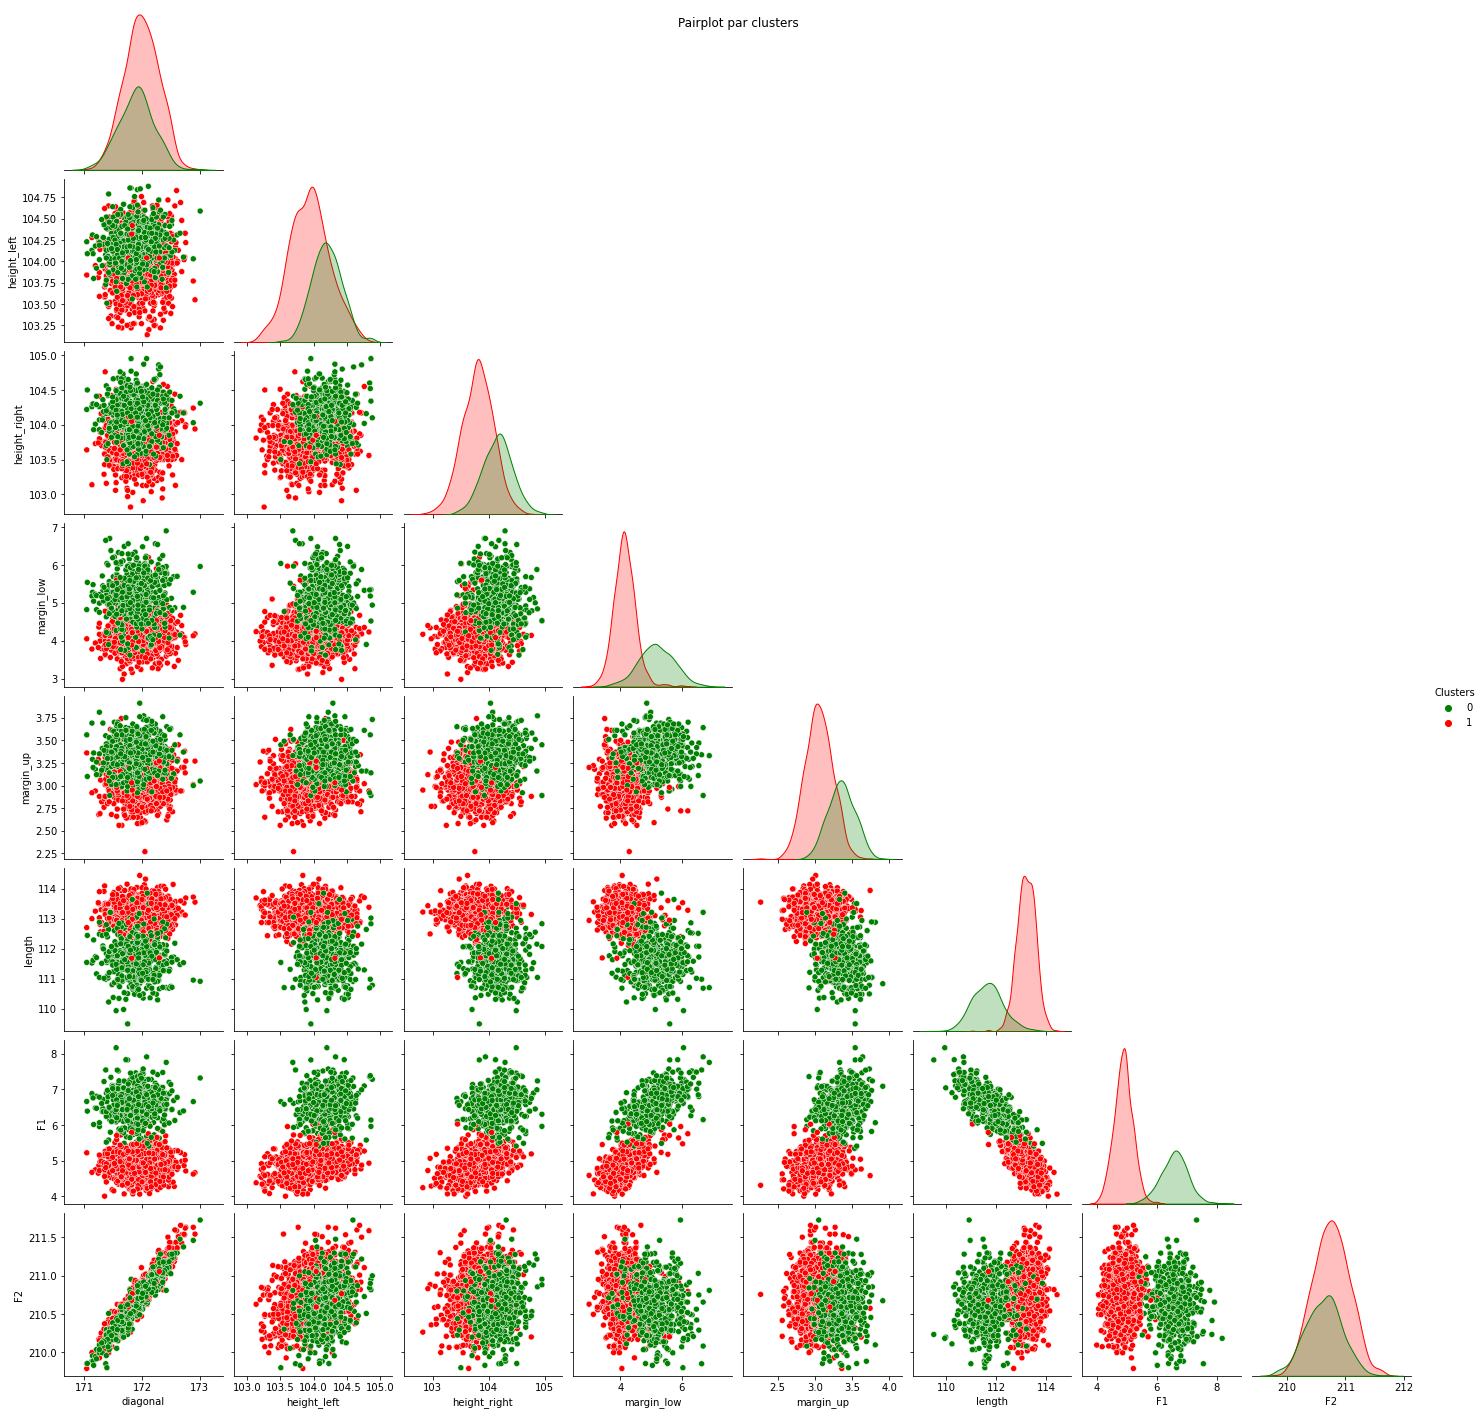

In [67]:
sns.pairplot(billets_kmeans.drop("is_genuine", axis=1), hue='Clusters', corner=True, palette={0: 'green', 1: 'red'}).fig.suptitle('Pairplot par clusters')
plt.show()

Sur F1 la distinction entre les clusters se remarque assez bien

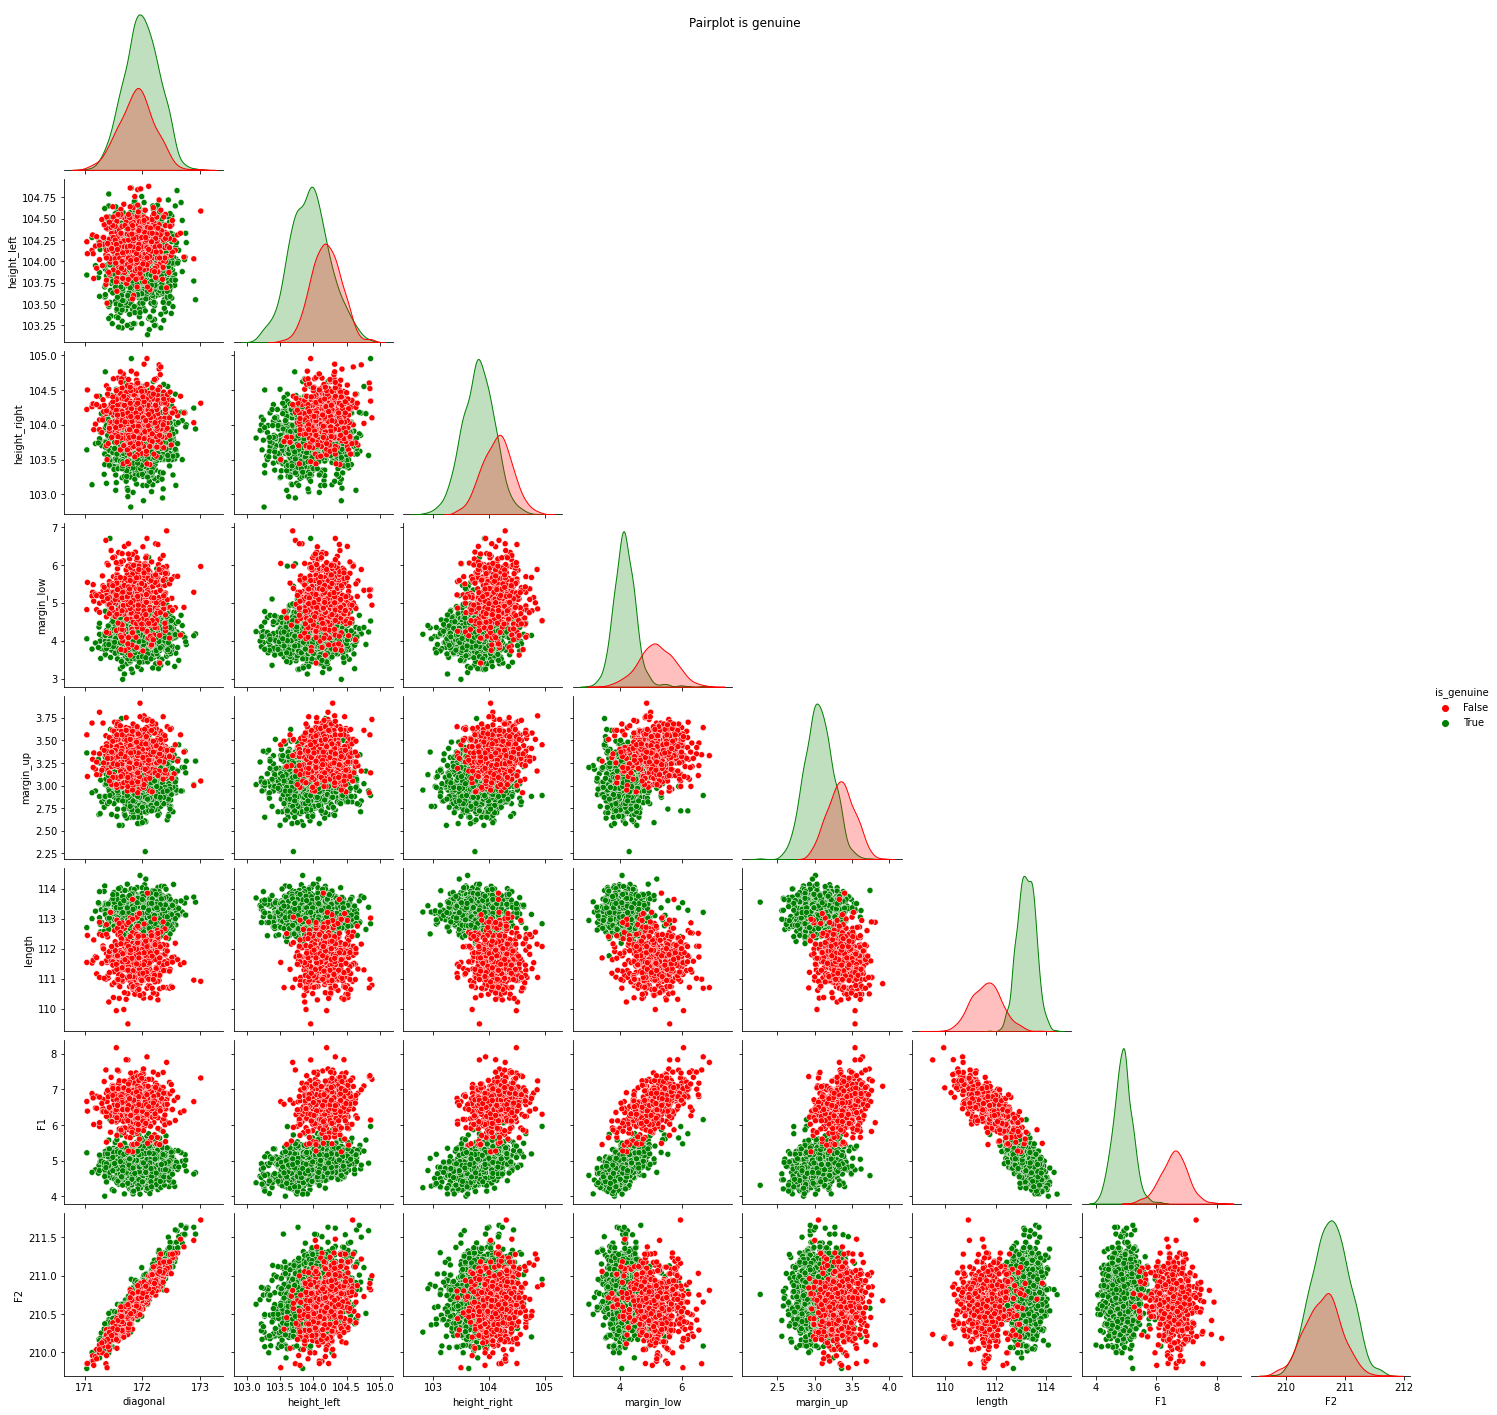

In [68]:
sns.pairplot(billets_kmeans.drop("Clusters", axis=1), hue='is_genuine', corner=True, palette={1: 'green', 0: 'red'}).fig.suptitle('Pairplot is genuine')
plt.show()

Sur F1 la distinction entre les vrais et faux billet se remarque assez bien  de plus on constate que le clustering est proche de la réalité

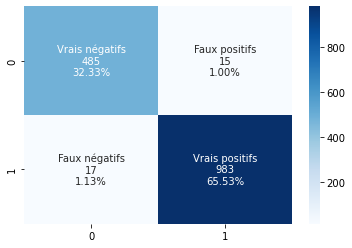

              precision    recall  f1-score   support

       False       0.97      0.97      0.97       500
        True       0.98      0.98      0.98      1000

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



In [69]:
from sklearn import cluster
import sklearn as sk



def matrice_confusion(a, b, nom_graphique):
    confusion_matrix = sk.metrics.confusion_matrix(a,b)
    group_names = ['Vrais négatifs','Faux positifs','Faux négatifs','Vrais positifs']
    group_counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
    group_percentages = [
        '{0:.2%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
 
    plt.show()
    
    classification = sk.metrics.classification_report(a,b)
    print(classification)
    
matrice_confusion(billets_kmeans['is_genuine'], billets_kmeans['Clusters'], 'kmeans_matrice-confusion')





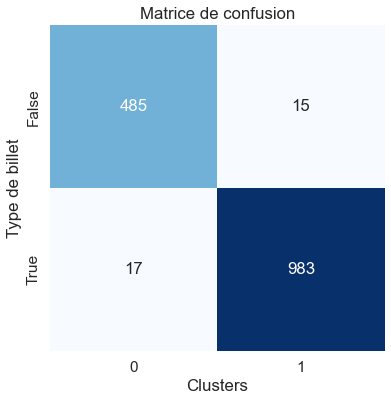

In [70]:
conf_matrix = pd.crosstab(billets_kmeans.is_genuine, km.labels_)

# Representation graphique de notre matrice de confusion
sns.set(rc={'figure.figsize': (6, 6)}, font_scale=1.4)
sns.heatmap(conf_matrix, annot = True, fmt='', cmap='Blues', cbar=False)

plt.title('Matrice de confusion')
plt.xlabel('Clusters')
plt.ylabel('Type de billet')
plt.show()

- Sur 1000 vrais billets 17 ont été considéré comme faux 
- Sur 500 faux billets 15 ont été considéré comme vrais

In [71]:
from sklearn.metrics import confusion_matrix

# Créer des données d'exemple
y_true = billets_kmeans['is_genuine']
y_pred = billets_kmeans['Clusters']

# Créer une matrice de confusion
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Afficher la matrice de confusion
print('Matrice de confusion :')
print('True Negatives :', tn)
print('False Positives :', fp)
print('False Negatives :', fn)
print('True Positives :', tp)


Matrice de confusion :
True Negatives : 485
False Positives : 15
False Negatives : 17
True Positives : 983


In [72]:
billets_prod = pd.read_csv('billets_production.csv', sep=',')
billets_prod

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [73]:
billets_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length  \
0       171.81       104.86        104.95    4.520000       2.89  112.83   
1       171.46       103.36        103.66    3.770000       2.99  113.09   
2       172.69       104.48        103.50    4.400000       2.94  113.16   
3       171.36       103.91        103.94    3.620000       3.01  113.51   
4       171.73       104.28        103.46    4.040000       3.48  112.54   
...        ...          ...           ...         ...        ...     ...   
1495    171.75       104.38        104.17    3.916298       3.09  111.28   
1496    172.19       104.63        104.44    4.024331       3.37  110.97   
1497    171.80       104.01        104.12    5.004097       3.36  111.95   
1498    172.06       104.28        104.06    4.687551       3.46  112.25   
1499    171.47       104.15        103.82    4.860373       3.37  112.07   

            F1          F2  is_genuine  Clusters  
0     5.960438  210.952114        True         0  
1     4.520694  210.086400        True         1  
2     4.980299  211.531184        True         1  
3     4.534334  210.224342        True         1  
4     5.373045  210.546008        True         1  
...        ...         ...         ...       ...  
1495  6.117746  210.620504       False         0  
1496  6.616558  211.112430       False         0  
1497  6.269083  210.503267       False         0  
1498  6.045162  210.861100       False         0  
1499  6.094319  210.219508       False         0  

[1500 rows x 10 columns]

In [74]:
billets_kmeans = pd.concat([billets_kmeans.drop("Clusters", axis = 1), billets_prod])
billets_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length  \
0     171.81       104.86        104.95        4.52       2.89  112.83   
1     171.46       103.36        103.66        3.77       2.99  113.09   
2     172.69       104.48        103.50        4.40       2.94  113.16   
3     171.36       103.91        103.94        3.62       3.01  113.51   
4     171.73       104.28        103.46        4.04       3.48  112.54   
..       ...          ...           ...         ...        ...     ...   
0     171.76       104.01        103.54        5.21       3.30  111.42   
1     171.87       104.17        104.13        6.00       3.31  112.09   
2     172.00       104.58        104.29        4.99       3.39  111.57   
3     172.49       104.55        104.34        4.44       3.03  113.20   
4     171.65       103.63        103.56        3.77       3.16  113.33   

          F1          F2 is_genuine   id  
0   5.960438  210.952114       True  NaN  
1   4.520694  210.086400       True  NaN  
2   4.980299  211.531184       True  NaN  
3   4.534334  210.224342       True  NaN  
4   5.373045  210.546008       True  NaN  
..       ...         ...        ...  ...  
0        NaN         NaN        NaN  A_1  
1        NaN         NaN        NaN  A_2  
2        NaN         NaN        NaN  A_3  
3        NaN         NaN        NaN  A_4  
4        NaN         NaN        NaN  A_5  

[1505 rows x 10 columns]

In [75]:
billets_kmeans=billets_kmeans.drop(columns = ['F1','F2'])
billets_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length  \
0     171.81       104.86        104.95        4.52       2.89  112.83   
1     171.46       103.36        103.66        3.77       2.99  113.09   
2     172.69       104.48        103.50        4.40       2.94  113.16   
3     171.36       103.91        103.94        3.62       3.01  113.51   
4     171.73       104.28        103.46        4.04       3.48  112.54   
..       ...          ...           ...         ...        ...     ...   
0     171.76       104.01        103.54        5.21       3.30  111.42   
1     171.87       104.17        104.13        6.00       3.31  112.09   
2     172.00       104.58        104.29        4.99       3.39  111.57   
3     172.49       104.55        104.34        4.44       3.03  113.20   
4     171.65       103.63        103.56        3.77       3.16  113.33   

   is_genuine   id  
0        True  NaN  
1        True  NaN  
2        True  NaN  
3        True  NaN  
4        True  NaN  
..        ...  ...  
0         NaN  A_1  
1         NaN  A_2  
2         NaN  A_3  
3         NaN  A_4  
4         NaN  A_5  

[1505 rows x 8 columns]

In [76]:
# Préparation des données de test pour l'ACP
z = billets_kmeans.drop(columns = ["is_genuine", "id"]).values

# Centrage et Réduction avec les données d'origine pour ne biaise pas le résultat
std_scale = preprocessing.StandardScaler().fit(z)
z_scaled = std_scale.transform(z)
z_scaled

array([[-0.4865586 ,  2.76923391,  3.16170796,  0.04586274, -1.13061318,
         0.17500507],
       [-1.63390724, -2.23576629, -0.79994111, -1.08434783, -0.69868709,
         0.47301405],
       [ 2.39820372,  1.50130053, -1.29130844, -0.13497095, -0.91465013,
         0.55324723],
       ...,
       [ 0.13628781,  1.83496721,  1.13481774,  0.75412803,  1.02901727,
        -1.26919229],
       [ 1.74257592,  1.7348672 ,  1.28837003, -0.07469305, -0.52591665,
         0.59909477],
       [-1.01106084, -1.33486626, -1.10704569, -1.08434783,  0.03558727,
         0.74809926]])

In [77]:
km.labels_


array([0, 1, 1, ..., 0, 0, 0])

In [78]:
# Classification méthode Kmeans
km = KMeans(2, random_state=150)
km.fit(z_scaled)

# Récupération des clusters attribués à chaque individu
billets_kmeans["Clusters"] = km.labels_
billets_kmeans

diagonal  height_left  height_right  margin_low  margin_up  length  \
0     171.81       104.86        104.95        4.52       2.89  112.83   
1     171.46       103.36        103.66        3.77       2.99  113.09   
2     172.69       104.48        103.50        4.40       2.94  113.16   
3     171.36       103.91        103.94        3.62       3.01  113.51   
4     171.73       104.28        103.46        4.04       3.48  112.54   
..       ...          ...           ...         ...        ...     ...   
0     171.76       104.01        103.54        5.21       3.30  111.42   
1     171.87       104.17        104.13        6.00       3.31  112.09   
2     172.00       104.58        104.29        4.99       3.39  111.57   
3     172.49       104.55        104.34        4.44       3.03  113.20   
4     171.65       103.63        103.56        3.77       3.16  113.33   

   is_genuine   id  Clusters  
0        True  NaN         0  
1        True  NaN         1  
2        True  NaN         1  
3        True  NaN         1  
4        True  NaN         1  
..        ...  ...       ...  
0         NaN  A_1         0  
1         NaN  A_2         0  
2         NaN  A_3         0  
3         NaN  A_4         1  
4         NaN  A_5         1  

[1505 rows x 9 columns]

In [79]:
X_projected = pca.transform(X_scaled)
X_projected

array([[ 1.62935975,  0.76179463,  2.77739806,  2.82273434, -0.47273097,
         0.32209869],
       [-2.02517229, -2.20016686, -0.94262455,  0.25454606,  0.17083819,
        -0.51771447],
       [-0.97206263,  2.63180665,  0.97347547, -1.22089335, -0.72226004,
         0.07004944],
       ...,
       [ 1.49407183, -0.55502988, -0.44435924,  0.06044459,  0.14348966,
         0.02775327],
       [ 1.43191519,  0.54949494,  0.12597041, -0.29478006,  0.78916158,
         0.1458977 ],
       [ 1.21372526, -1.50730698,  0.38935656, -0.70426543,  0.34354999,
         0.0059328 ]])

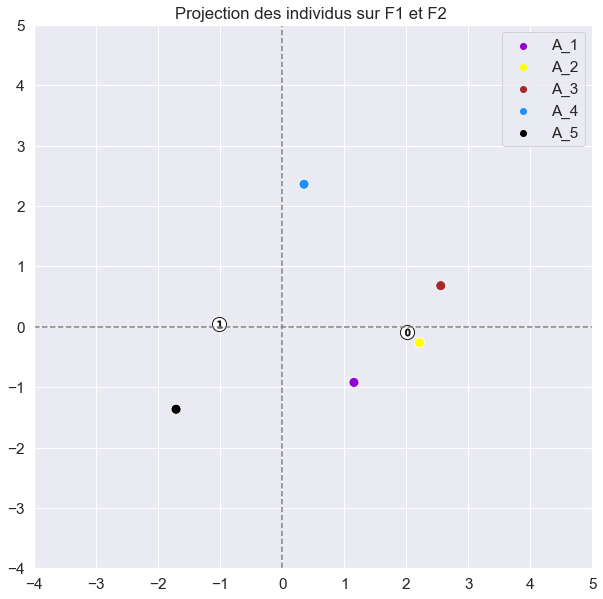

In [80]:


# Projection des individus d'origine, en ajoutant les individus inconnus sur F1 et F2
# Comparer avec les clusters

z_projected = pca.transform(z_scaled[-5:])
clusters = km.labels_

sns.set(rc={'figure.figsize': (10, 10)}, font_scale=1.4)

sns.scatterplot(x=z_projected[:, 0], y=z_projected[:, 1], palette=['darkviolet', 'yellow',
                'brown', 'dodgerblue', 'black'], hue=billets_kmeans.id[-5:], s=100)
plt.legend()
plt.title("Projection des individus sur F1 et F2 ")

# Affichage des positions des centres de classes
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1],
            marker="o", c="white", alpha=1, s=200, edgecolor="k")
for i, c in enumerate(centroids_projected):
    plt.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

# affichage des lignes horizontales et verticales
plt.plot([-4, 5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-4, 5], color='grey', ls='--')

# définition des limites du graphique
plt.xlim([-4, 5])
plt.ylim([-4, 5])

plt.show(block=False)



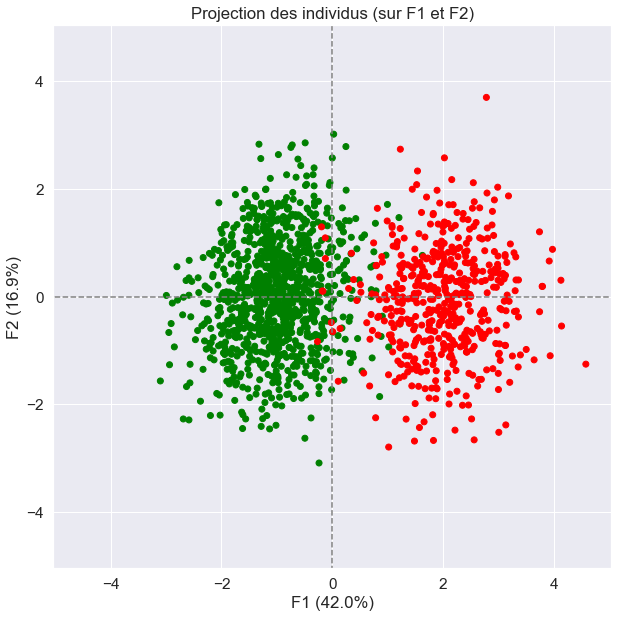

In [81]:
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)], illustrative_var=billets.is_genuine)

Graphiquement on peut déduire : 
A1,A2,A3 sont de faux billets 
A4 est entre les deux, mais semblerait etre vrai
A5 est un vrai billet

In [82]:


# Prédiction par Kmeans
y_kmeans = km.predict(z_scaled[-5:])
pred_kmeans = pd.DataFrame(y_kmeans, index=billets_kmeans.id[-5:],columns=['Clusters']).reset_index()
pred_kmeans



id  Clusters
0  A_1         0
1  A_2         0
2  A_3         0
3  A_4         1
4  A_5         1

Le clustering effectué par le kmeans prédit que A1,A2,A3 sont de faux billets (cluster 0) et que A4 et A5 sont de vrais billets (cluster 1)

## **3.2 REGRESSION LOGISTIQUE**

Lorsqu'on a cherché à remplacer les valeurs manquantes de la variable margin_low on a vu la régression linéaire. Maintenant nous allons voir la regression logistique.

La régression linéaire et la régression logistique sont toutes deux des techniques de modélisation statistique utilisées pour prédire une variable de sortie en fonction d'une ou plusieurs variables d'entrée.

Cependant, la régression linéaire est utilisée pour prédire une variable de sortie continue, telle que la prédiction du prix d'une maison en fonction de ses caractéristiques, tandis que la régression logistique est utilisée pour prédire une variable de sortie binaire ou catégorielle, telle que la classification d'un e-mail en tant que spam ou non spam.

En régression linéaire, la variable de sortie est continue, de sorte que la relation entre la variable de sortie et les variables d'entrée peut être modélisée à l'aide d'une équation linéaire. L'objectif est de trouver la droite qui minimise la distance entre les valeurs prédites et les valeurs réelles.

En régression logistique, la variable de sortie est une variable binaire ou catégorielle. La relation entre les variables d'entrée et la variable de sortie est modélisée à l'aide d'une fonction logistique, qui cartographie les valeurs continues à un intervalle fini de valeurs discrètes. L'objectif est de trouver les paramètres qui maximisent la probabilité de la classification correcte des données d'entraînement.

In [83]:
billets_mle

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95    4.520000       2.89   
1           True    171.46       103.36        103.66    3.770000       2.99   
2           True    172.69       104.48        103.50    4.400000       2.94   
3           True    171.36       103.91        103.94    3.620000       3.01   
4           True    171.73       104.28        103.46    4.040000       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17    3.916298       3.09   
1496       False    172.19       104.63        104.44    4.024331       3.37   
1497       False    171.80       104.01        104.12    5.004097       3.36   
1498       False    172.06       104.28        104.06    4.687551       3.46   
1499       False    171.47       104.15        103.82    4.860373       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [84]:
billets_mle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [85]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


# Charger les données de test
test_data = pd.read_csv('billets_production.csv')

# Créer un modèle de régression logistique
model = LogisticRegression()
model.fit(billets_mle.drop("is_genuine", axis=1), billets_mle["is_genuine"])

# Prédire la classe des données de test
y_pred = model.predict(test_data.drop("id", axis=1))

# Calculer la probabilité de chaque classe pour les données de test
y_proba = model.predict_proba(test_data.drop("id", axis=1))

# Afficher les prédictions et les probabilités associées
for i in range(len(y_pred)):
    if y_pred[i]:
        print("Le billet d'identifiant {} est un vrai billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][1]*100))
    else:
        print("Le billet d'identifiant {} est un faux billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][0]*100))
# Évaluer la performance du modèle sur les données d'entraînement
y_train_pred = model.predict(billets_mle.drop("is_genuine", axis=1))
accuracy = accuracy_score(billets_mle["is_genuine"], y_train_pred)
confusion = confusion_matrix(billets_mle["is_genuine"], y_train_pred)
print("Accuracy : ", accuracy)
print("Matrice de confusion : \n", confusion)


Le billet d'identifiant A_1 est un faux billet avec une probabilité de 99.17%.
Le billet d'identifiant A_2 est un faux billet avec une probabilité de 99.71%.
Le billet d'identifiant A_3 est un faux billet avec une probabilité de 99.90%.
Le billet d'identifiant A_4 est un vrai billet avec une probabilité de 91.78%.
Le billet d'identifiant A_5 est un vrai billet avec une probabilité de 99.96%.
Accuracy :  0.9826666666666667
Matrice de confusion : 
 [[483  17]
 [  9 991]]


Ce code Python effectue une prédiction de la classe d'une série de billets à partir d'un modèle de régression logistique entraîné sur un ensemble de données appelé "billets_mle". Les données de test sont chargées depuis un fichier CSV appelé "billets_production.csv". Le modèle entraîné est utilisé pour prédire la classe de chaque billet dans les données de test, ainsi que la probabilité associée à chaque classe pour chaque billet. Les résultats de la prédiction sont ensuite affichés à l'écran. Enfin, la performance du modèle est évaluée en utilisant l'exactitude et la matrice de confusion pour les données d'entraînement.

## **3.3 KNN**

Le modèle KNN (k-nearest neighbors) est un algorithme d'apprentissage supervisé utilisé pour la classification et la régression. 

C'est une méthode de classification qui consiste à trouver les "k" exemples les plus proches d'un nouvel exemple (basé sur une mesure de distance) dans un ensemble de données d'entraînement, et utiliser leurs étiquettes pour prédire l'étiquette de l'exemple de test. Par exemple, si k = 3 et deux des exemples les plus proches sont de la classe "chien" et un de la classe "chat", alors l'exemple de test serait classé comme "chien".

Le choix de la valeur de "k" peut avoir un impact significatif sur la performance du modèle. Des valeurs de "k" plus grandes réduisent l'impact des bruits dans les données, mais peuvent également réduire la capacité du modèle à identifier des modèles subtils.

Le modèle KNN est simple à comprendre et à mettre en œuvre, mais peut être sensible aux données aberrantes et aux jeux de données de grande dimension.

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Charger les données de test
test_data = pd.read_csv('billets_production.csv')

# Créer un modèle KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(billets_mle.drop("is_genuine", axis=1), billets_mle["is_genuine"])

# Prédire la classe des données de test
y_pred = model.predict(test_data.drop("id", axis=1))

# Calculer la probabilité de chaque classe pour les données de test
y_proba = model.predict_proba(test_data.drop("id", axis=1))

# Afficher les prédictions et les probabilités associées
for i in range(len(y_pred)):
    if y_pred[i]:
        print("Le billet d'identifiant {} est un vrai billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][1]*100))
    else:
        print("Le billet d'identifiant {} est un faux billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][0]*100))
# Évaluer la performance du modèle sur les données d'entraînement
y_train_pred = model.predict(billets_mle.drop("is_genuine", axis=1))
accuracy = accuracy_score(billets_mle["is_genuine"], y_train_pred)
confusion = confusion_matrix(billets_mle["is_genuine"], y_train_pred)
print("Accuracy : ", accuracy)
print("Matrice de confusion : \n", confusion)

Le billet d'identifiant A_1 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_2 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_3 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_4 est un vrai billet avec une probabilité de 100.00%.
Le billet d'identifiant A_5 est un vrai billet avec une probabilité de 100.00%.
Accuracy :  0.9826666666666667
Matrice de confusion : 
 [[484  16]
 [ 10 990]]


Ce code utilise l'algorithme des k plus proches voisins (KNN) pour classifier des billets de banque comme vrais ou faux. Il utilise la librairie scikit-learn de Python pour créer un modèle KNN en utilisant 5 voisins, l'entraîner sur un ensemble de données d'apprentissage, puis prédire les classes de l'ensemble de données de test. Il calcule également la probabilité de chaque classe pour les données de test en utilisant la fonction predict_proba(). Ensuite, il affiche les prédictions et les probabilités associées pour chaque billet. Enfin, il évalue la performance du modèle en calculant l'accuracy et la matrice de confusion pour les données d'apprentissage.

## **3.3 RANDOM FOREST**

Random Forest est un algorithme d'apprentissage automatique supervisé utilisé pour la classification, la régression et d'autres tâches. Il est basé sur l'ensemble de plusieurs arbres de décision construits à partir d'échantillons aléatoires de données d'entraînement.

Chaque arbre de décision est construit à partir d'un échantillon différent de la dataset d'entraînement et les prédictions sont obtenues en agrégeant les prédictions de tous les arbres. Cette agrégation est effectuée soit en prenant la moyenne des prédictions pour une tâche de régression, soit en prenant le mode pour une tâche de classification.

Les Random Forest ont plusieurs avantages, notamment leur capacité à gérer des données de haute dimensionnalité et des données avec des valeurs manquantes, ainsi que leur capacité à fournir des estimations de l'importance des variables.

Cependant, les Random Forest peuvent être coûteux en termes de temps de calcul et de mémoire, et ils peuvent être moins interprétables que certains autres modèles. En outre, ils peuvent ne pas être adaptés aux tâches pour lesquelles les données sont corrélées ou ont des dépendances temporelles.

Plus simplement :
    Un modèle de prédiction random forest est un algorithme qui utilise de nombreux arbres de décision pour prédire une variable cible. Chaque arbre de décision est construit à partir d'un sous-ensemble des données d'entraînement et des variables d'entrée aléatoires. Le modèle combine ensuite les prédictions de tous les arbres pour obtenir une prédiction globale. Cette méthode permet de réduire le surapprentissage et d'améliorer la précision des prédictions. En d'autres termes, le modèle random forest utilise un grand nombre d'arbres de décision pour prédire la valeur d'une variable cible, ce qui permet d'obtenir des prédictions plus précises et plus robustes que les modèles basés sur un seul arbre de décision.

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



# Créer un modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(billets_mle.drop("is_genuine", axis=1), billets_mle["is_genuine"])

# Charger les données de test
test_data =  pd.read_csv('billets_production.csv')

# Prédire la classe des données de test
y_pred = model.predict(test_data.drop("id", axis=1))

# Calculer la probabilité de chaque classe pour les données de test
y_proba = model.predict_proba(test_data.drop("id", axis=1))

# Afficher les prédictions et les probabilités associées
for i in range(len(y_pred)):
    if y_pred[i]:
        print("Le billet d'identifiant {} est un vrai billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][1]*100))
    else:
        print("Le billet d'identifiant {} est un faux billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][0]*100))

# Évaluer la performance du modèle sur les données d'entraînement
y_train_pred = model.predict(billets_mle.drop("is_genuine", axis=1))
accuracy = accuracy_score(billets_mle["is_genuine"], y_train_pred)
confusion = confusion_matrix(billets_mle["is_genuine"], y_train_pred)
print("Accuracy : ", accuracy)
print("Matrice de confusion : \n", confusion)


Le billet d'identifiant A_1 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_2 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_3 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_4 est un vrai billet avec une probabilité de 93.00%.
Le billet d'identifiant A_5 est un vrai billet avec une probabilité de 100.00%.
Accuracy :  1.0
Matrice de confusion : 
 [[ 500    0]
 [   0 1000]]


Ce code Python utilise la bibliothèque pandas et le module RandomForestClassifier de scikit-learn pour entraîner un modèle de classification de forêt aléatoire sur des données d'apprentissage "billets_mle". Le modèle est ensuite utilisé pour prédire la classe de nouvelles données de test à partir d'un fichier CSV appelé "billets_production.csv". Les probabilités de chaque classe pour les nouvelles données sont calculées à l'aide de la méthode "predict_proba" du modèle et sont affichées pour chaque ligne du fichier. Enfin, la performance du modèle est évaluée sur les données d'apprentissage en calculant la précision et la matrice de confusion.


## **3.4 Modèle de réseau de neurones**

Un modèle de prédiction de réseau de neurones est un type de modèle d'apprentissage automatique qui consiste en un réseau de neurones artificiels organisés en couches. Les réseaux de neurones sont des modèles mathématiques inspirés du fonctionnement du cerveau humain. Ils sont capables de traiter des données complexes et de trouver des modèles cachés dans les données.

Le modèle de prédiction de réseau de neurones prend en entrée un ensemble de données et apprend à prédire une sortie en fonction de ces données. Le modèle utilise des poids et des biais pour ajuster les connexions entre les neurones et ainsi optimiser sa prédiction.

Les réseaux de neurones peuvent être utilisés pour une grande variété de tâches de prédiction, telles que la classification d'images, la reconnaissance de la parole, la prédiction de séries chronologiques, etc. Les performances des modèles de prédiction de réseau de neurones dépendent de nombreux facteurs tels que la complexité du modèle, le choix de l'architecture du réseau, la qualité des données d'entraînement, la taille de l'ensemble de données, etc.

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Séparer les caractéristiques et les cibles
X = billets_mle.drop('is_genuine', axis=1).values
y = billets_mle['is_genuine'].values

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Créer le modèle de réseau de neurones
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Charger une nouvelle dataset de billets
new_data =  pd.read_csv('billets_production.csv')

# Préparer les données de la nouvelle dataset pour la prédiction
X_new = new_data.drop('id', axis=1).values

# Faire des prédictions sur la nouvelle dataset
y_pred_new = clf.predict(X_new)
y_proba_new = clf.predict_proba(X_new)

# Afficher les prédictions et les probabilités associées
for i in range(len(y_pred_new)):
    if y_pred_new[i]:
        print("Le billet d'identifiant {} est un vrai billet avec une probabilité de {:.2f}%.".format(new_data.iloc[i]["id"], y_proba_new[i][1]*100))
    else:
        print("Le billet d'identifiant {} est un faux billet avec une probabilité de {:.2f}%.".format(new_data.iloc[i]["id"], y_proba_new[i][0]*100))


Accuracy: 91.78%
Confusion matrix:
 [[120  34]
 [  3 293]]
Le billet d'identifiant A_1 est un faux billet avec une probabilité de 77.62%.
Le billet d'identifiant A_2 est un faux billet avec une probabilité de 95.81%.
Le billet d'identifiant A_3 est un faux billet avec une probabilité de 69.12%.
Le billet d'identifiant A_4 est un vrai billet avec une probabilité de 87.60%.
Le billet d'identifiant A_5 est un vrai billet avec une probabilité de 98.03%.


Ce code effectue une classification de billets en faux ou vrais billets à l'aide d'un modèle de réseau de neurones à couches cachées (MLPClassifier) de la bibliothèque Scikit-learn. Il utilise la fonction train_test_split pour diviser les données en ensemble d'entraînement et de test, puis entraîne le modèle sur l'ensemble d'entraînement et teste sa précision sur l'ensemble de test. Le modèle est ensuite utilisé pour prédire les classes des billets dans une nouvelle dataset, avec leurs probabilités associées.

## **3.5 CHOIX DU MODELE**

Je décide de retenir le modèle "random forest" qui semble être le plus pertinent et performant dans notre cas, son accuracy score est de 1, on constate dans la matrice de confusion qu'il obtient bien 1000 vrais billets et 500 faux. 

# **4. APPLICATION FINALE**

In [106]:

# Créer un modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(billets_mle.drop("is_genuine", axis=1), billets_mle["is_genuine"])

# Charger les données de test
test_data =  pd.read_csv('billets_production.csv')

# Prédire la classe des données de test
y_pred = model.predict(test_data.drop("id", axis=1))

# Calculer la probabilité de chaque classe pour les données de test
y_proba = model.predict_proba(test_data.drop("id", axis=1))

# Afficher les prédictions et les probabilités associées
for i in range(len(y_pred)):
    if y_pred[i]:
        print("Le billet d'identifiant {} est un vrai billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][1]*100))
    else:
        print("Le billet d'identifiant {} est un faux billet avec une probabilité de {:.2f}%.".format(test_data.iloc[i]["id"], y_proba[i][0]*100))

# Évaluer la performance du modèle sur les données d'entraînement
y_train_pred = model.predict(billets_mle.drop("is_genuine", axis=1))
accuracy = accuracy_score(billets_mle["is_genuine"], y_train_pred)
confusion = confusion_matrix(billets_mle["is_genuine"], y_train_pred)
print("Accuracy : ", accuracy)
print("Matrice de confusion : \n", confusion)


Le billet d'identifiant A_1 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_2 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_3 est un faux billet avec une probabilité de 100.00%.
Le billet d'identifiant A_4 est un vrai billet avec une probabilité de 93.00%.
Le billet d'identifiant A_5 est un vrai billet avec une probabilité de 100.00%.
Accuracy :  1.0
Matrice de confusion : 
 [[ 500    0]
 [   0 1000]]
